In [1]:
import os
os.chdir(os.path.expanduser("~/Projects/zimmer"))
import pickle

import numpy as np
np.random.seed(1234)

import matplotlib.pyplot as plt
plt.ion()

from tqdm import tqdm
from functools import partial

from zimmer.io import load_kato_data
import zimmer.plotting as zplt

from ssm.models import HMM, SLDS, LDS
from ssm.util import find_permutation, compute_state_overlap
from ssm.preprocessing import pca_with_imputation, trend_filter

In [2]:
# Load the data
ys, ms, z_trues, z_true_key, neuron_names = load_kato_data(include_unnamed=False, signal="dff")
ys = [trend_filter(y) for y in ys]

K_true = len(z_true_key)
N = ys[0].shape[1]
W = len(ys)
Ts = [y.shape[0] for y in ys]

Only including named neurons.
59 neurons across all 5 worms


In [3]:
K = 25
D = 3

In [4]:
N_iters = 1000

print("Fitting SLDS with {} states and {} latent dimensions".format(K, D))
slds = SLDS(N, K, D, transitions="standard", dynamics="t", emissions="gaussian")
elbos, variational_params = slds.fit(ys, masks=ms, optimizer="adam", num_iters=1000, print_intvl=1)
xs = [vp[0] for vp in variational_params]

Fitting SLDS with 25 states and 3 latent dimensions
Initializing with an ARHMM using 25 steps of EM.
Done
Iteration 0.  ELBO: 198834.5
Iteration 1.  ELBO: 199754.4
Iteration 2.  ELBO: 200670.3
Iteration 3.  ELBO: 201633.5
Iteration 4.  ELBO: 201285.0
Iteration 5.  ELBO: 201694.2
Iteration 6.  ELBO: 202534.6
Iteration 7.  ELBO: 202588.2
Iteration 8.  ELBO: 203295.0
Iteration 9.  ELBO: 203256.9
Iteration 10.  ELBO: 204904.0
Iteration 11.  ELBO: 205099.4
Iteration 12.  ELBO: 204909.9
Iteration 13.  ELBO: 205687.1
Iteration 14.  ELBO: 205350.0
Iteration 15.  ELBO: 206200.1
Iteration 16.  ELBO: 206906.3
Iteration 17.  ELBO: 207224.7
Iteration 18.  ELBO: 207926.9
Iteration 19.  ELBO: 207973.6
Iteration 20.  ELBO: 207838.1
Iteration 21.  ELBO: 208875.8
Iteration 22.  ELBO: 208900.4
Iteration 23.  ELBO: 209542.0
Iteration 24.  ELBO: 210285.3
Iteration 25.  ELBO: 210705.1
Iteration 26.  ELBO: 209994.8
Iteration 27.  ELBO: 210696.4
Iteration 28.  ELBO: 211338.3
Iteration 29.  ELBO: 211843.3
Iter

Iteration 265.  ELBO: 266071.4
Iteration 266.  ELBO: 266154.6
Iteration 267.  ELBO: 266173.1
Iteration 268.  ELBO: 266999.1
Iteration 269.  ELBO: 266869.3
Iteration 270.  ELBO: 266817.8
Iteration 271.  ELBO: 266594.5
Iteration 272.  ELBO: 267204.0
Iteration 273.  ELBO: 266721.3
Iteration 274.  ELBO: 267619.3
Iteration 275.  ELBO: 267336.3
Iteration 276.  ELBO: 268358.8
Iteration 277.  ELBO: 268083.2
Iteration 278.  ELBO: 267942.6
Iteration 279.  ELBO: 268514.8
Iteration 280.  ELBO: 268589.1
Iteration 281.  ELBO: 268381.9
Iteration 282.  ELBO: 269091.6
Iteration 283.  ELBO: 268487.5
Iteration 284.  ELBO: 269334.9
Iteration 285.  ELBO: 268950.3
Iteration 286.  ELBO: 269130.8
Iteration 287.  ELBO: 268828.3
Iteration 288.  ELBO: 269677.6
Iteration 289.  ELBO: 269533.2
Iteration 290.  ELBO: 269876.6
Iteration 291.  ELBO: 270245.9
Iteration 292.  ELBO: 269581.4
Iteration 293.  ELBO: 270144.4
Iteration 294.  ELBO: 270463.9
Iteration 295.  ELBO: 270541.4
Iteration 296.  ELBO: 270813.1
Iteratio

Iteration 530.  ELBO: 294880.4
Iteration 531.  ELBO: 294986.7
Iteration 532.  ELBO: 294666.5
Iteration 533.  ELBO: 295124.6
Iteration 534.  ELBO: 295143.9
Iteration 535.  ELBO: 295292.2
Iteration 536.  ELBO: 295412.1
Iteration 537.  ELBO: 295474.1
Iteration 538.  ELBO: 295008.8
Iteration 539.  ELBO: 295605.6
Iteration 540.  ELBO: 295418.4
Iteration 541.  ELBO: 295330.3
Iteration 542.  ELBO: 295517.0
Iteration 543.  ELBO: 295902.3
Iteration 544.  ELBO: 295749.3
Iteration 545.  ELBO: 295742.0
Iteration 546.  ELBO: 296029.4
Iteration 547.  ELBO: 296043.8
Iteration 548.  ELBO: 295696.8
Iteration 549.  ELBO: 296442.2
Iteration 550.  ELBO: 296484.8
Iteration 551.  ELBO: 296144.7
Iteration 552.  ELBO: 296467.4
Iteration 553.  ELBO: 295759.2
Iteration 554.  ELBO: 296607.3
Iteration 555.  ELBO: 296804.2
Iteration 556.  ELBO: 296670.3
Iteration 557.  ELBO: 296918.5
Iteration 558.  ELBO: 296963.3
Iteration 559.  ELBO: 296859.3
Iteration 560.  ELBO: 296895.2
Iteration 561.  ELBO: 297057.2
Iteratio

Iteration 795.  ELBO: 309779.4
Iteration 796.  ELBO: 310268.3
Iteration 797.  ELBO: 309594.4
Iteration 798.  ELBO: 309983.7
Iteration 799.  ELBO: 310161.7
Iteration 800.  ELBO: 310084.2
Iteration 801.  ELBO: 310164.1
Iteration 802.  ELBO: 310421.5
Iteration 803.  ELBO: 310106.9
Iteration 804.  ELBO: 310230.6
Iteration 805.  ELBO: 310191.4
Iteration 806.  ELBO: 310370.9
Iteration 807.  ELBO: 310481.9
Iteration 808.  ELBO: 310719.7
Iteration 809.  ELBO: 310550.4
Iteration 810.  ELBO: 310786.3
Iteration 811.  ELBO: 310390.0
Iteration 812.  ELBO: 310940.1
Iteration 813.  ELBO: 310340.9
Iteration 814.  ELBO: 310677.0
Iteration 815.  ELBO: 310846.4
Iteration 816.  ELBO: 310727.1
Iteration 817.  ELBO: 310684.3
Iteration 818.  ELBO: 311105.0
Iteration 819.  ELBO: 310550.3
Iteration 820.  ELBO: 311022.7
Iteration 821.  ELBO: 311114.0
Iteration 822.  ELBO: 311156.7
Iteration 823.  ELBO: 310857.4
Iteration 824.  ELBO: 311230.0
Iteration 825.  ELBO: 311171.3
Iteration 826.  ELBO: 311359.1
Iteratio

In [5]:
zs = [slds.most_likely_states(x, y, mask=m) for x, y, m in zip(xs, ys, ms)]
Ezs = [slds.expected_states(x, y, mask=m)[0] for x, y, m in zip(xs, ys, ms)]

<Container object of 25 artists>

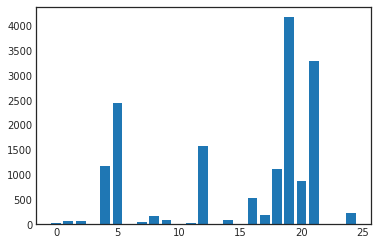

In [6]:
usage = np.sum([np.bincount(z, minlength=K) for z in zs], axis=0)
plt.bar(np.arange(K), usage)

Text(0,0.5,'ELBO')

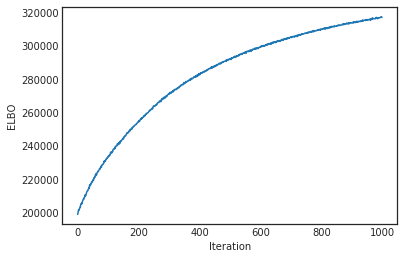

In [7]:
plt.figure()
plt.plot(elbos)
plt.xlabel("Iteration")
plt.ylabel("ELBO")

Text(0.5,0.98,'Continuous Latent States (Zimmer Labels)')

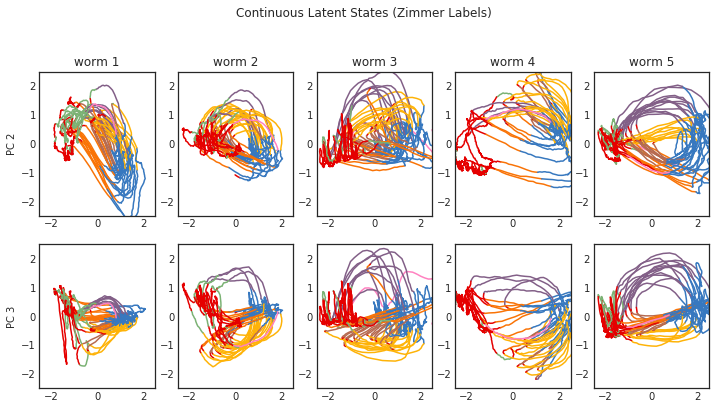

In [8]:
plt.figure(figsize=(12, 9))
for w, (x, z) in enumerate(zip(xs, z_trues)):
    ax = plt.subplot(3, W, w+1)
    zplt.plot_2d_continuous_states(x, z, xlims=(-2.5, 2.5), ylims=(-2.5, 2.5), inds=(0, 1), ax=ax)
    plt.ylabel("PC 2" if w == 0 else "")
    plt.title("worm {}".format(w+1))

    ax = plt.subplot(3, W, W+w+1)
    zplt.plot_2d_continuous_states(x, z, xlims=(-2.5, 2.5), ylims=(-2.5, 2.5), inds=(0, 2), ax=ax)
    plt.ylabel("PC 3" if w == 0 else "")

#     ax = plt.subplot(3, W, 2*W+w+1)
#     zplt.plot_2d_continuous_states(x, z, xlims=(-2.5, 2.5), ylims=(-2.5, 2.5), inds=(0, 3), ax=ax)
#     plt.xlabel("PC 1")
#     plt.ylabel("PC 4" if w == 0 else "")
    
plt.suptitle("Continuous Latent States (Zimmer Labels)")

In [9]:
colors = np.vstack((zplt.default_colors, zplt.default_colors))

Text(0.5,0.98,'Continuous Latent States (Inferred Labels)')

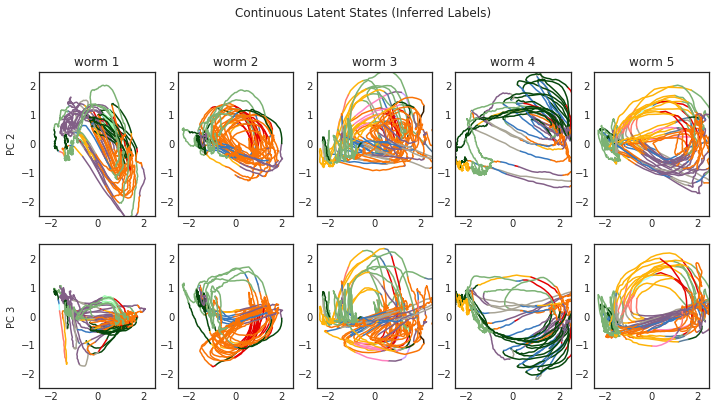

In [10]:
plt.figure(figsize=(12, 9))
for w, (x, z) in enumerate(zip(xs, zs)):
    ax = plt.subplot(3, W, w+1)
    zplt.plot_2d_continuous_states(x, z, colors=colors, xlims=(-2.5, 2.5), ylims=(-2.5, 2.5), inds=(0, 1), ax=ax)
    plt.ylabel("PC 2" if w == 0 else "")
    plt.title("worm {}".format(w+1))

    ax = plt.subplot(3, W, W+w+1)
    zplt.plot_2d_continuous_states(x, z, colors=colors, xlims=(-2.5, 2.5), ylims=(-2.5, 2.5), inds=(0, 2), ax=ax)
    plt.ylabel("PC 3" if w == 0 else "")

#     ax = plt.subplot(3, W, 2*W+w+1)
#     zplt.plot_2d_continuous_states(x, z, xlims=(-2.5, 2.5), ylims=(-2.5, 2.5), inds=(0, 3), ax=ax)
#     plt.xlabel("PC 1")
#     plt.ylabel("PC 4" if w == 0 else "")
    
plt.suptitle("Continuous Latent States (Inferred Labels)")

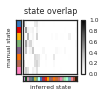

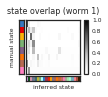

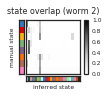

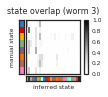

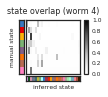

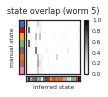

In [11]:
zplt.plot_state_overlap(zs, z_trues)

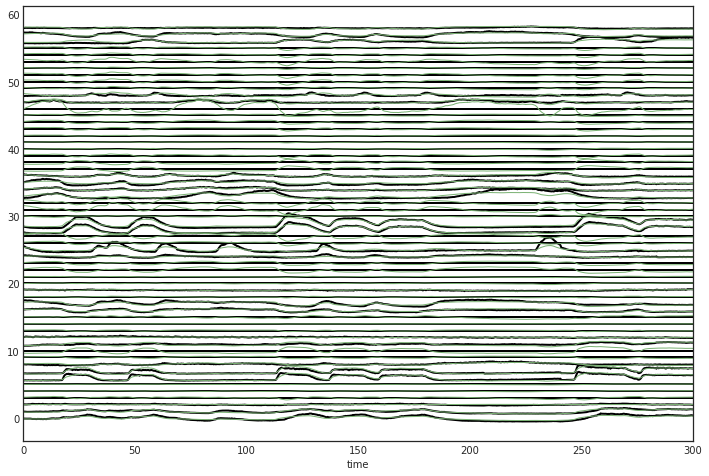

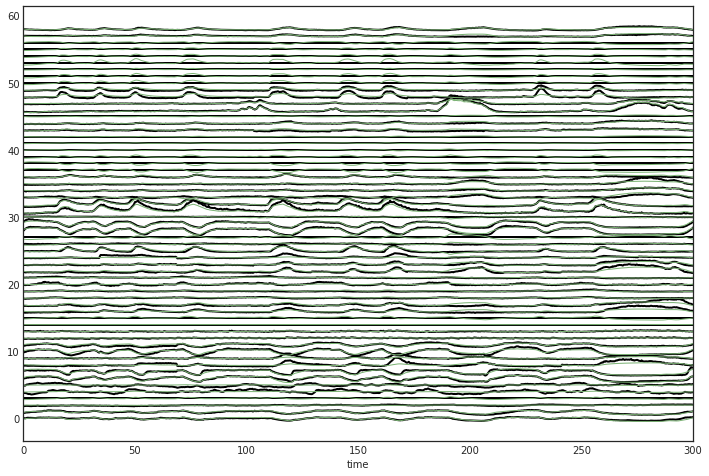

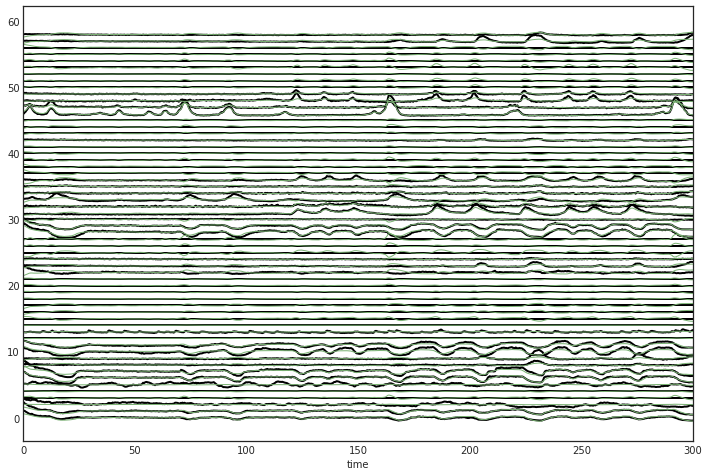

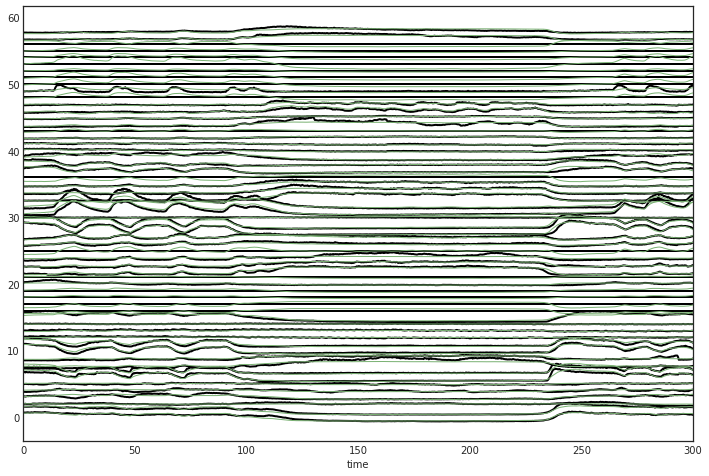

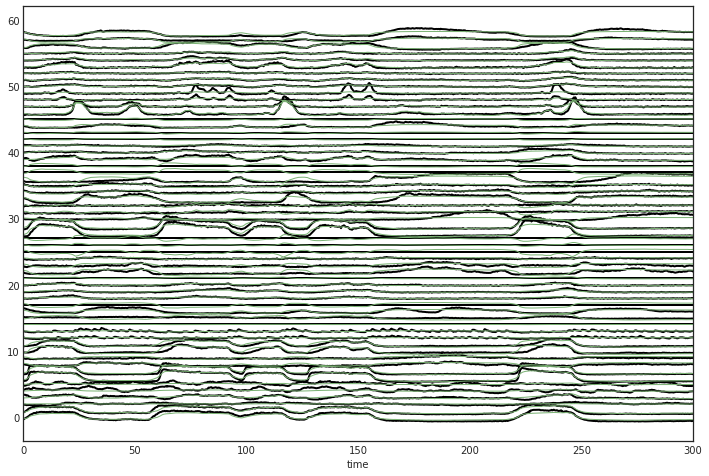

In [12]:
ysms = [slds.smooth(x, y) for x, y in zip(xs, ys)]

for w in range(W):
    plt.figure(figsize=(12, 8))
    plt.plot(np.arange(Ts[w]) / 3.0, ys[w] + np.arange(N), '-k', lw=2)
    plt.plot(np.arange(Ts[w]) / 3.0, ysms[w] + np.arange(N), '-', lw=1, color=zplt.default_colors[3])
    plt.xlim(0, 5 * 60)
    plt.xlabel("time")


A
[[ 1.   -0.02 -0.03]
 [ 0.01  0.97  0.01]
 [ 0.    0.01  0.96]]
b
[[ 0.2  -0.02  0.03]
 [-0.04  0.04  0.19]
 [ 0.09 -0.14  0.03]
 [-0.22  0.07 -0.05]
 [ 0.22 -0.22 -0.01]
 [ 0.09 -0.19 -0.25]
 [ 0.24  0.04 -0.12]
 [-0.17  0.13 -0.11]
 [ 0.21 -0.07  0.09]
 [-0.14  0.04  0.01]
 [-0.15 -0.03  0.14]
 [-0.21  0.02  0.02]
 [-0.07  0.08 -0.02]
 [ 0.08  0.1  -0.3 ]
 [-0.02 -0.   -0.17]
 [ 0.16  0.15 -0.02]
 [ 0.12 -0.03 -0.07]
 [-0.1   0.06 -0.19]
 [-0.16  0.05  0.02]
 [-0.01  0.    0.02]
 [-0.12  0.16 -0.05]
 [ 0.01 -0.07  0.04]
 [-0.14 -0.16 -0.  ]
 [-0.25  0.    0.01]
 [-0.03 -0.02 -0.15]]
sigma
[[0.00311976 0.00759701 0.00442715]
 [0.00213348 0.00535353 0.00293808]
 [0.00470091 0.00400585 0.00207043]
 [0.00143012 0.00324708 0.00226541]
 [0.00245409 0.008396   0.00161245]
 [0.0102549  0.00628242 0.00433948]
 [0.00238156 0.00337959 0.00151855]
 [0.00120654 0.00557201 0.00514361]
 [0.00235786 0.00585769 0.00396599]
 [0.00207043 0.0042963  0.00255424]
 [0.00193045 0.00396599 0.0023344 ]
 [0.

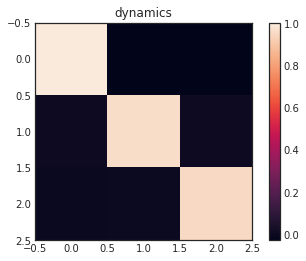

In [14]:
plt.imshow(slds.dynamics.As[0])
plt.title("dynamics")
plt.colorbar()

print("A")
print(slds.dynamics.As[0].round(2))
print("b")
print(slds.dynamics.bs.round(2))
print("sigma")
print(np.exp(slds.dynamics.inv_sigmas.round(2)))

[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]]
[ 0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0.  0. -0. -0. -0. -0. -0.
 -0.  0. -0. -0.  0. -0. -0.  0. -0. -0.  0.  0. -0. -0. -0.  0. -0. -0.
 -0.  0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0. -0.  0.  0.  0. -0.
 -0.  0.  0. -0. -0.]
[[0.01356856 0.011109   0.01370493 0.02085837 0.02522297 0.02472353
  0.01624451 0.01849971 0.02759833 0.02599113 0.02678268 0.0214936
  0.00615802 0.00673795 0.00524752 0.02732372 0.02759833 0.02678268
  0.0071546  0.00767337 0.00995182 0.00546167 0.02989691 0.02547647
  0.01455239 0.02472353 0.01673923 0.02399284 0.0219278  0.01868564
  0.02547647 0.02625234 0.02328374 0.02547647 0.01673923 0.01426423
  0.0278757  0.024972   0.01303653 0.02305206 0.0095616  0.00882647
  0.0057417  0.01167857 0.02423397 0.00628242 0.02573251 0.01514628
  0.02651618 0.02705185 0.0057994  0.00562801 0.00546167 0.0200405
  0.01343355 0.00995182 0.01640777 0.02651618 0.02522297]]


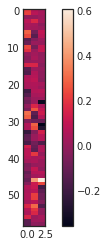

In [16]:
C = slds.emissions.Cs[0]
plt.imshow(C, aspect=0.5)
plt.colorbar()
print(C.T.dot(C).round(2))
print(slds.emissions.ds[0].round(2))
print(np.exp(slds.emissions.inv_etas.round(2)))

# Try a random walk dynamics model

In [44]:
import autograd.numpy as np
import autograd.numpy.random as npr
from autograd.scipy.stats import norm

from ssm.observations import _Observations
from ssm.util import logistic, logit

class SmoothRandomWalkObservations(_Observations):
    def __init__(self, K, D, M=0):
        super(SmoothRandomWalkObservations, self).__init__(K, D, M)
        
        # Distribution over initial point
        self.mu_init = np.zeros(D)
        self.inv_sigma_init = np.zeros(D)
        
        # AR parameters
        self.logit_as = logit(0.9 * np.ones(K))
        self.bs = npr.randn(K, D)
        self.inv_sigmas = -4 + npr.randn(K, D)

    @property
    def params(self):
        # return self.logit_as, self.bs, self.inv_sigmas
        return self.bs, self.inv_sigmas
        
    @params.setter
    def params(self, value):
        # self.logit_as, self.bs, self.inv_sigmas = value
        self.bs, self.inv_sigmas = value
        
    @property
    def a(self):
        return logistic(self.logit_as)
        
    def permute(self, perm):
        self.logit_as = self.logit_as[perm]
        self.bs = self.bs[perm]
        self.inv_sigmas = self.inv_sigmas[perm]

    def initialize(self, datas, inputs=None, masks=None, tags=None):
#         # Initialize with linear regressions
#         from sklearn.linear_model import LinearRegression
#         data = np.concatenate(datas) 
#         input = np.concatenate(inputs)
#         T = data.shape[0]

#         for k in range(self.K):
#             ts = npr.choice(T-self.lags, replace=False, size=(T-self.lags)//self.K)
#             x = np.column_stack([data[ts + l] for l in range(self.lags)] + [input[ts]])
#             y = data[ts+self.lags]
#             lr = LinearRegression().fit(x, y)
#             self.As[k] = lr.coef_[:, :self.D * self.lags]
#             self.Vs[k] = lr.coef_[:, self.D * self.lags:]
#             self.bs[k] = lr.intercept_
            
#             resid = y - lr.predict(x)
#             sigmas = np.var(resid, axis=0)
#             self.inv_sigmas[k] = np.log(sigmas + 1e-8)
        pass
        
    def _compute_mus(self, data, input, mask, tag):
        assert np.all(mask), "ARHMM cannot handle missing data"
        T, D = data.shape
        
        # 
        mus = (1 - self.a[None, :, None]) * data[:-1, None, :]
        mus = mus + self.a[:, None] * self.bs
        
        # Pad with the initial condition
        mus = np.concatenate((self.mu_init * np.ones((1, self.K, self.D)), mus))

        assert mus.shape == (T, self.K, D)
        return mus

    def log_likelihoods(self, data, input, mask, tag):
        mus = self._compute_mus(data, input, mask, tag)
        sigmas = np.exp(self.inv_sigmas)
        return -0.5 * np.sum(
            (np.log(2 * np.pi * sigmas) + (data[:, None, :] - mus)**2 / sigmas) 
            * mask[:, None, :], axis=2)

    def m_step(self, expectations, datas, inputs, masks, tags, num_fp_iters=10, **kwargs):
        from sklearn.linear_model import LinearRegression
        D, M = self.D, self.M

        for k in range(self.K):
            xs, ys, ds, weights = [], [], [], []
            for (Ez, _), data, input in zip(expectations, datas, inputs):
                xs.append(data[:-1])
                ys.append(data[1:])
                weights.append(Ez[1:,k])

            xs = np.concatenate(xs)
            ys = np.concatenate(ys)
            weights = np.concatenate(weights)
            
            # Find optimal bs[k]
            ds = (ys - (1 - self.a[k]) * xs)
            self.bs[k] = np.sum(weights * ds, axis=0) / np.sum(weights) / self.a[k]
            
            # Update the variances
            yhats = (1 - self.a[k]) * xs + self.a[k] * self.bs[k]
            sqerr = (ys - yhats)**2
            self.inv_sigmas[k] = np.log(np.average(sqerr, weights=weights, axis=0))
        
#     def sample_x(self, z, xhist, input=None, tag=None):
#         D, As, bs, sigmas = self.D, self.As, self.bs, np.exp(self.inv_sigmas)
#         if xhist.shape[0] < self.lags:
#             mu_init = self.mu_init
#             sigma_init = np.exp(self.inv_sigma_init)
#             return mu_init + np.sqrt(sigma_init) * npr.randn(D)
#         else:
#             mu = bs[z]
#             for l in range(self.lags):
#                 mu += As[z][:,l*D:(l+1)*D].dot(xhist[-l-1])
#             return np.sqrt(sigmas[z]) * npr.randn(D)

    def smooth(self, expectations, data, input, tag):
        """
        Compute the mean observation under the posterior distribution
        of latent discrete states.
        """
        T = expectations.shape[0]
        mask = np.ones((T, self.D), dtype=bool) 
        mus = self._compute_mus(data, input, mask, tag)
        return (expectations[:, :, None] * mus).sum(1)

In [45]:
from ssm.transitions import StationaryTransitions
from ssm.init_state_distns import InitialStateDistribution
from ssm.core import _HMM

K = 25
hmm = _HMM(K, D, 0, 
          InitialStateDistribution(K, D),
          StationaryTransitions(K, D),
          SmoothRandomWalkObservations(K, D))


In [ ]:
hmm.fit(xs, method="em")

Iteration 0.  LL: -64657.0
Iteration 1.  LL: -47046.8
Iteration 2.  LL: -35107.2
Iteration 3.  LL: -26859.6
Iteration 4.  LL: -20877.4
Iteration 5.  LL: -16536.5
Iteration 6.  LL: -13293.8
Iteration 7.  LL: -10741.1
Iteration 8.  LL: -8598.6
Iteration 9.  LL: -6848.6
Iteration 10.  LL: -5357.3
Iteration 11.  LL: -4107.4
Iteration 12.  LL: -3143.4
Iteration 13.  LL: -2412.3
Iteration 14.  LL: -1823.5
Iteration 15.  LL: -1366.9
Iteration 16.  LL: -962.6
Iteration 17.  LL: -619.7
Iteration 18.  LL: -280.0
Iteration 19.  LL: 71.2
Iteration 20.  LL: 373.5
Iteration 21.  LL: 612.8
Iteration 22.  LL: 820.8
Iteration 23.  LL: 982.1
Iteration 24.  LL: 1098.3
Iteration 25.  LL: 1188.9
Iteration 26.  LL: 1265.8
Iteration 27.  LL: 1336.4
Iteration 28.  LL: 1391.7
Iteration 29.  LL: 1439.3
Iteration 30.  LL: 1494.1
Iteration 31.  LL: 1549.0
Iteration 32.  LL: 1591.7
Iteration 33.  LL: 1637.2
Iteration 34.  LL: 1670.3
Iteration 35.  LL: 1692.4
Iteration 36.  LL: 1709.2
Iteration 37.  LL: 1724.8
Iter

In [35]:
zs = [hmm.most_likely_states(x) for x in xs]

Text(0.5,0.98,'Continuous Latent States (Inferred Labels)')

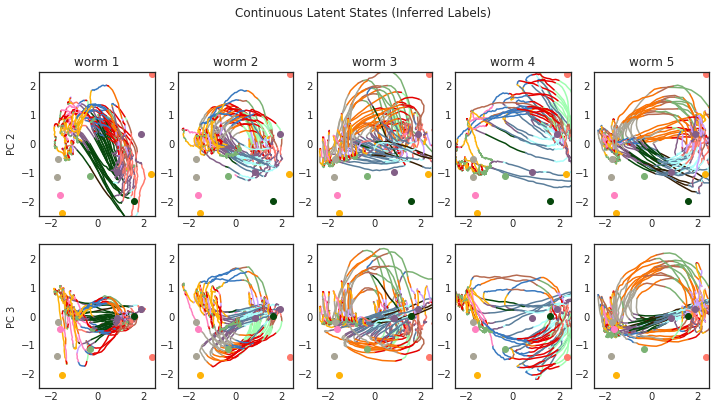

In [43]:
bs = hmm.observations.bs

plt.figure(figsize=(12, 9))
for w, (x, z) in enumerate(zip(xs, zs)):
    ax = plt.subplot(3, W, w+1)
    zplt.plot_2d_continuous_states(x, z, colors=colors, xlims=(-2.5, 2.5), ylims=(-2.5, 2.5), inds=(0, 1), ax=ax)

    for k,b in enumerate(bs):
        plt.plot(b[0], b[1], 'o', color=colors[k])
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)

    plt.ylabel("PC 2" if w == 0 else "")
    plt.title("worm {}".format(w+1))

    ax = plt.subplot(3, W, W+w+1)
    zplt.plot_2d_continuous_states(x, z, colors=colors, xlims=(-2.5, 2.5), ylims=(-2.5, 2.5), inds=(0, 2), ax=ax)
    plt.ylabel("PC 3" if w == 0 else "")

    for k,b in enumerate(bs):
        plt.plot(b[0], b[2], 'o', color=colors[k])
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)
    
#     ax = plt.subplot(3, W, 2*W+w+1)
#     zplt.plot_2d_continuous_states(x, z, xlims=(-2.5, 2.5), ylims=(-2.5, 2.5), inds=(0, 3), ax=ax)
#     plt.xlabel("PC 1")
#     plt.ylabel("PC 4" if w == 0 else "")
    
plt.suptitle("Continuous Latent States (Inferred Labels)")